In [ ]:
# Analytics Assignment 1
# Marmik Parashar
# PNR 240810125002

Customer Segmentation Dataset (Mall Customers)
Description: Data about mall customers, including their annual income, spending score, and age.
Link: Mall Customers Dataset on Kaggle
Columns: Age, Annual Income, Spending Score, Gender.
Use Cases: Clustering customers by income or spending score, calculating mean and median income and age for targeted marketing.

        Age      Fare
min   0.420    0.0000
25%  20.125    7.9104
50%  28.000   14.4542
75%  38.000   31.0000
max  80.000  512.3292


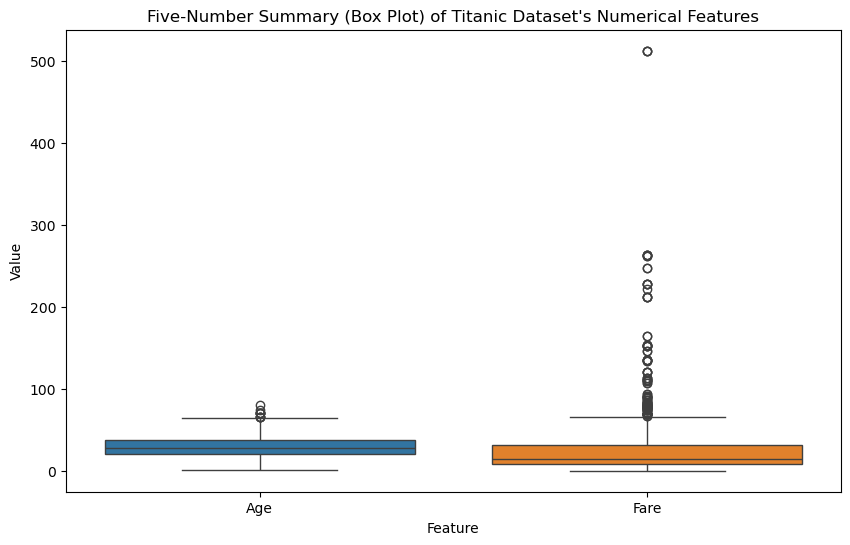

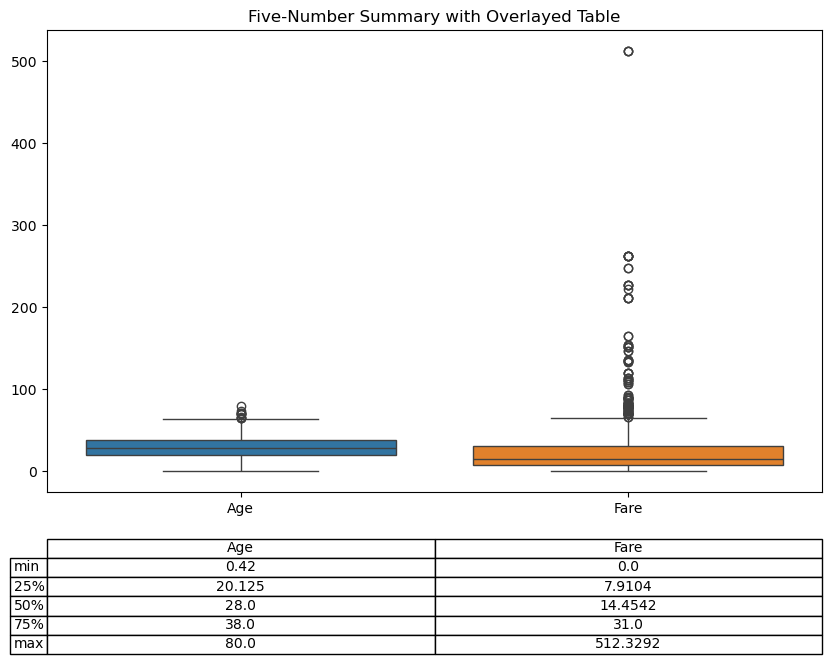

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler


# Load Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_df = pd.read_csv(url)

# Display the first few rows of the dataset
titanic_df.head()

# Select numerical columns to calculate five-number summary
numerical_cols = ['Age', 'Fare']

# Calculate five-number summary
five_number_summary = titanic_df[numerical_cols].describe(percentiles=[0.25, 0.5, 0.75]).loc[['min', '25%', '50%', '75%', 'max']]
print(five_number_summary)


# Set up the plotting area
plt.figure(figsize=(10, 6))

# Create box plots for each numerical column
sns.boxplot(data=titanic_df[numerical_cols])

# Add labels and title
plt.title("Five-Number Summary (Box Plot) of Titanic Dataset's Numerical Features")
plt.ylabel("Value")
plt.xlabel("Feature")

plt.show()

# Show five-number summary as a table below the plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=titanic_df[numerical_cols])
plt.title("Five-Number Summary with Overlayed Table")

# Overlay the summary table
plt.table(cellText=five_number_summary.values, colLabels=five_number_summary.columns, rowLabels=five_number_summary.index,
          cellLoc="center", loc="bottom", bbox=[0, -0.35, 1, 0.25])

plt.show()

In [3]:
#Wine
    

# Load the Wine Quality Red dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
wine_df = pd.read_csv(url, sep=';')

# EDA - Measures of Central Tendency for selected features: acidity, sugar, alcohol
central_tendency = {}
features = ['fixed acidity', 'residual sugar', 'alcohol']  # Acidity, Sugar, Alcohol

for column in features:
    mean = wine_df[column].mean()
    median = wine_df[column].median()
    mode = wine_df[column].mode()[0]  # Taking the first mode in case of multiple modes
    central_tendency[column] = {'Mean': mean, 'Median': median, 'Mode': mode}

# Display central tendency
central_tendency_df = pd.DataFrame(central_tendency).T
print("Measures of Central Tendency (Acidity, Sugar, Alcohol):")
print(central_tendency_df)

# Additional EDA - Checking for missing values
print("\nMissing Values in the dataset:")
print(wine_df.isnull().sum())

# Feature Engineering - Scaling the selected features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(wine_df[features])  # Scale acidity, sugar, and alcohol
scaled_df = pd.DataFrame(scaled_features, columns=features)
scaled_df['quality'] = wine_df['quality']  # Add 'quality' back for reference

print("\nScaled Feature Sample (Acidity, Sugar, Alcohol):")
print(scaled_df.head())

Measures of Central Tendency (Acidity, Sugar, Alcohol):
                     Mean  Median  Mode
fixed acidity    8.319637     7.9   7.2
residual sugar   2.538806     2.2   2.0
alcohol         10.422983    10.2   9.5

Missing Values in the dataset:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Scaled Feature Sample (Acidity, Sugar, Alcohol):
   fixed acidity  residual sugar   alcohol  quality
0      -0.528360       -0.453218 -0.960246        5
1      -0.298547        0.043416 -0.584777        5
2      -0.298547       -0.169427 -0.584777        5
3       1.654856       -0.453218 -0.584777        6
4      -0.528360       -0.453218 -0.960246        5


House Price

/tmp/ipykernel_14106/1414998790.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = ames_df.groupby('Neighborhood', group_keys=False).apply(lambda x: x.sample(frac=0.2, random_state=1))


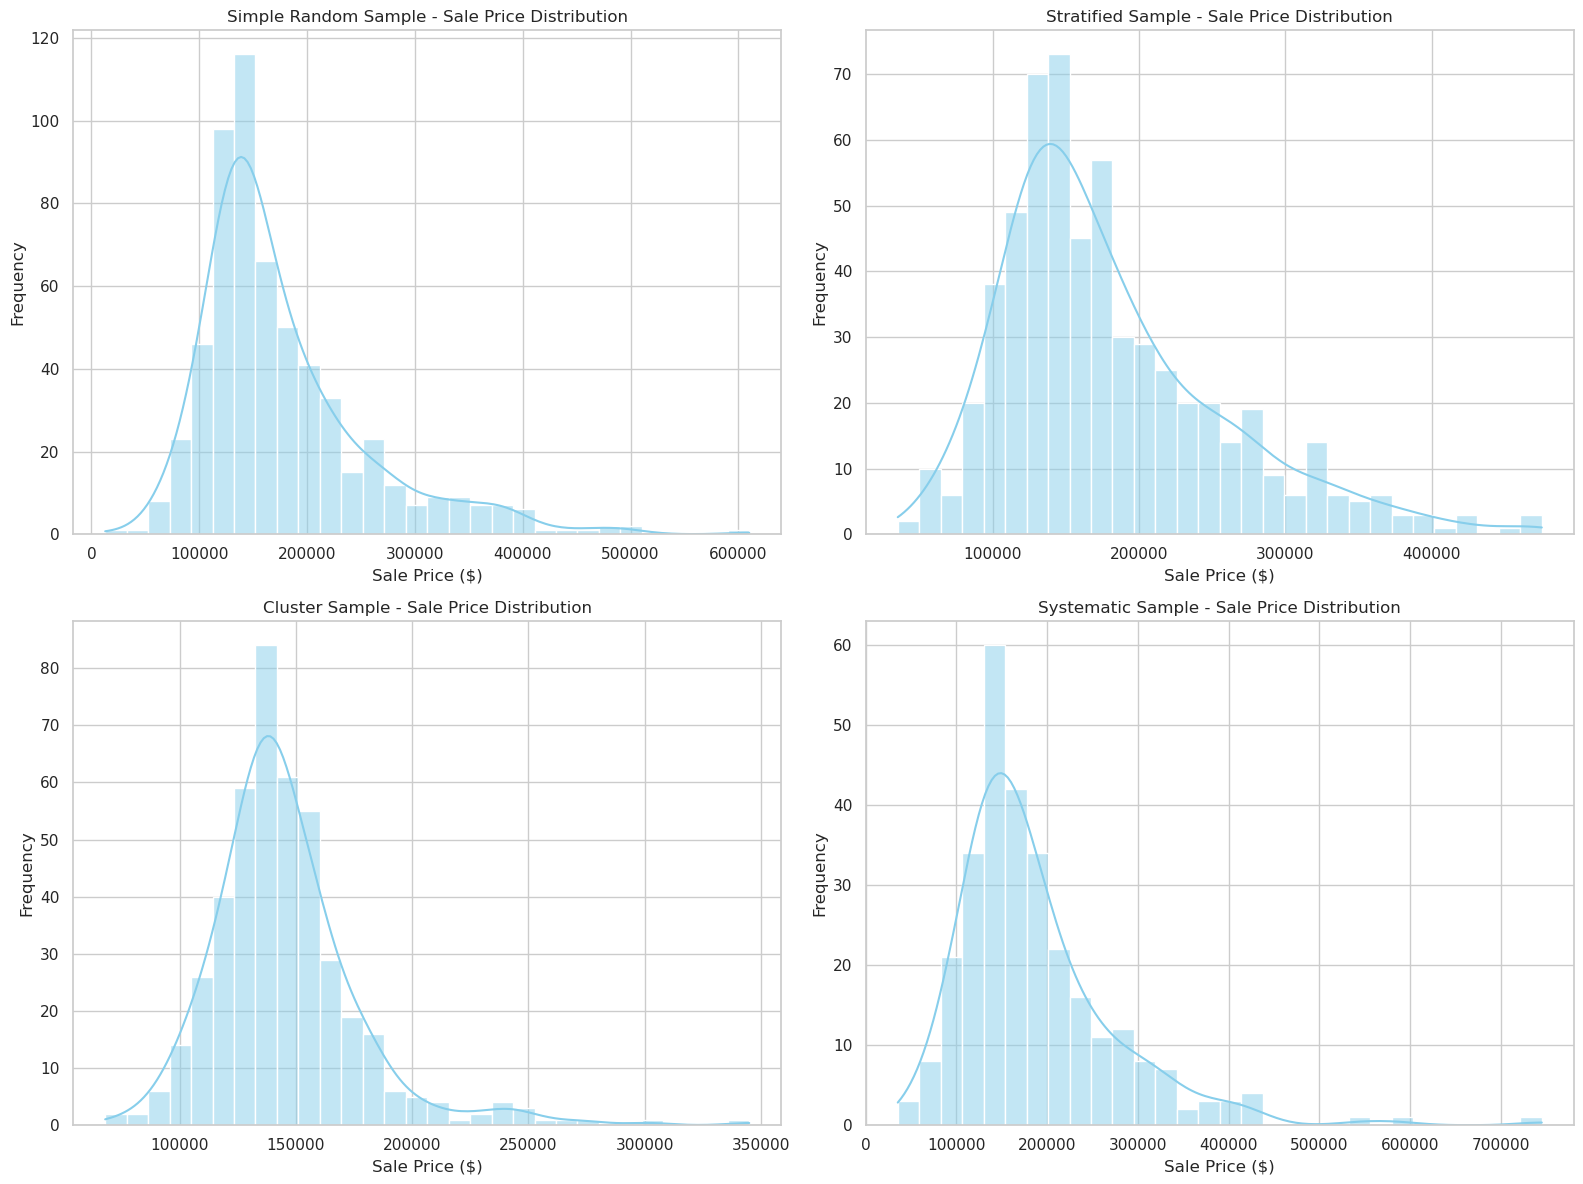

Central Tendencies for 'SalePrice' and 'TotRms AbvGrd':
            SalePrice  TotRms AbvGrd
Mean    180796.060068       6.443003
Median  160000.000000       6.000000
Mode    135000.000000       6.000000


In [9]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Ames Housing dataset from a CSV file
# Make sure the CSV file is placed in the working directory
ames_df = pd.read_csv('C:\\Users\\marmi\\OneDrive\\Documents\\AmesHousing.csv')

# Inspect the columns to verify
# print(ames_df.columns)

# Use correct column for Cluster Sampling ('BldgType' might not be present, so you can use another column like 'Neighborhood')
# Let's use 'Neighborhood' for clustering

# 1. Simple Random Sampling (20% sample of the dataset)
simple_random_sample = ames_df.sample(frac=0.2, random_state=1)

# 2. Stratified Sampling (20% sample from each neighborhood)
stratified_sample = ames_df.groupby('Neighborhood', group_keys=False).apply(lambda x: x.sample(frac=0.2, random_state=1))

# 3. Cluster Sampling (Dividing into clusters based on neighborhood and sampling from one cluster)
# Let's assume 'Neighborhood' for clustering
cluster_sample = ames_df[ames_df['Neighborhood'] == 'NAmes']  # Selecting one cluster (Neighborhood = NAmes)

# 4. Systematic Sampling (Selecting every 10th sample in the dataset)
systematic_sample = ames_df.iloc[::10]

# Set the figure size for visualization
plt.figure(figsize=(16, 12))
sns.set(style="whitegrid")

# Visualize the sale price distribution for each sampling technique
sampling_methods = {
    "Simple Random Sample": simple_random_sample,
    "Stratified Sample": stratified_sample,
    "Cluster Sample": cluster_sample,
    "Systematic Sample": systematic_sample,
}

# Loop through each sampling technique and plot
for i, (method, sample_data) in enumerate(sampling_methods.items(), 1):
    plt.subplot(2, 2, i)
    sns.histplot(sample_data['SalePrice'], kde=True, bins=30, color='skyblue')
    plt.title(f"{method} - Sale Price Distribution")
    plt.xlabel("Sale Price ($)")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the Ames Housing dataset
ames_df = pd.read_csv('C:\\Users\\marmi\\OneDrive\\Documents\\AmesHousing.csv')

# Measure of central tendencies for 'SalePrice' and 'TotRms AbvGrd' (Total Rooms Above Ground)
central_tendency = {}

# For Sale Price
central_tendency['SalePrice'] = {
    'Mean': ames_df['SalePrice'].mean(),
    'Median': ames_df['SalePrice'].median(),
    'Mode': ames_df['SalePrice'].mode()[0]  # Take the first mode in case of multiple
}

# For Total Rooms Above Ground
central_tendency['TotRms AbvGrd'] = {
    'Mean': ames_df['TotRms AbvGrd'].mean(),
    'Median': ames_df['TotRms AbvGrd'].median(),
    'Mode': ames_df['TotRms AbvGrd'].mode()[0]  # Take the first mode in case of multiple
}

# Convert the dictionary to a DataFrame for better readability
central_tendency_df = pd.DataFrame(central_tendency)

# Display the central tendency measures
print("Central Tendencies for 'SalePrice' and 'TotRms AbvGrd':")
print(central_tendency_df)

Adult Income

/tmp/ipykernel_14106/2379941965.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_income_sample = adult_df.groupby('income', group_keys=False).apply(lambda x: x.sample(frac=0.2, random_state=1))
/tmp/ipykernel_14106/2379941965.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_education_sample = adult_df.groupby('education', group_keys=False).apply(lambda x: x.sample(frac=0.2, ran

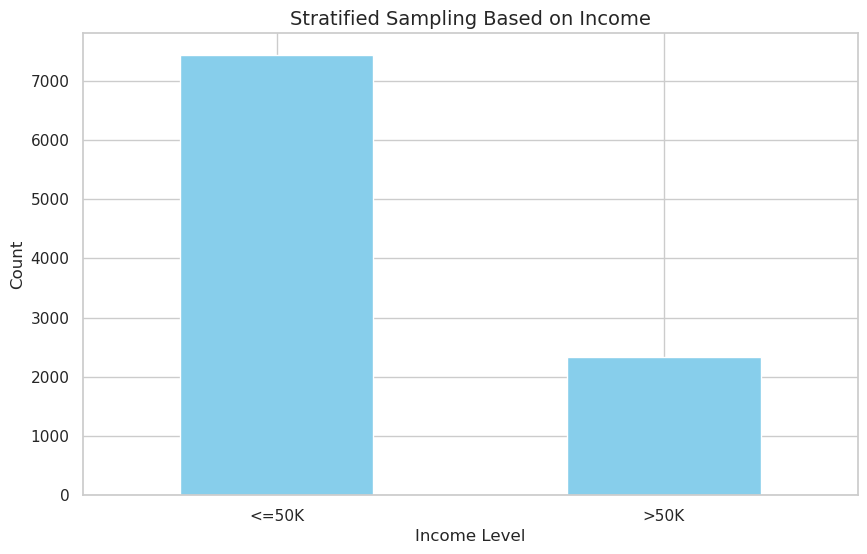

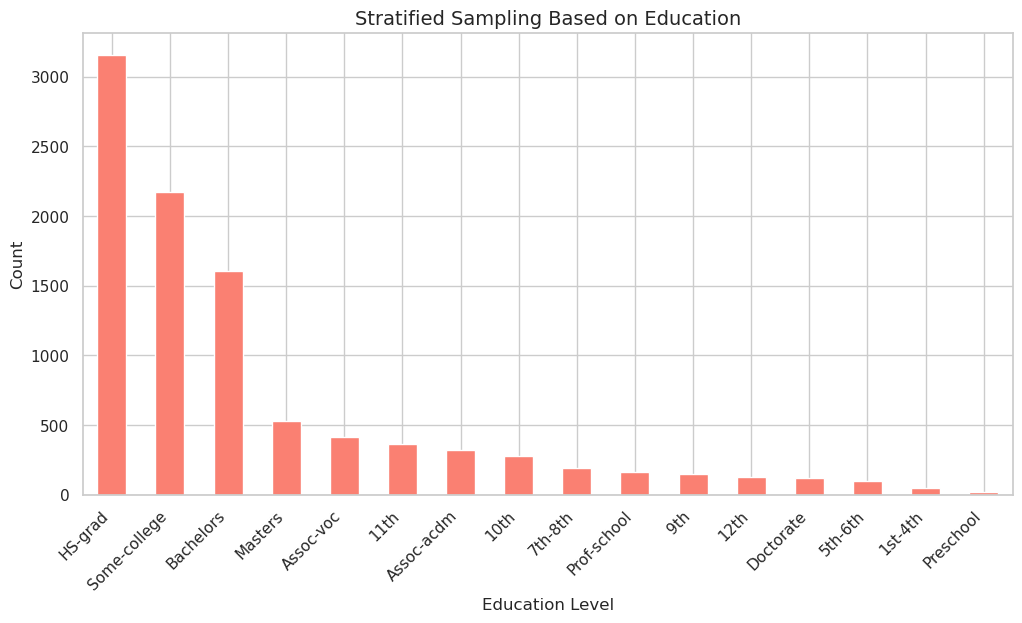


Stratified sampling based on Income:
income
<=50K    7431
>50K     2337
Name: count, dtype: int64

Stratified sampling based on Education:
education
HS-grad         3157
Some-college    2176
Bachelors       1605
Masters          531
Assoc-voc        412
11th             362
Assoc-acdm       320
10th             278
7th-8th          191
Prof-school      167
9th              151
12th             131
Doctorate        119
5th-6th          102
1st-4th           49
Preschool         17
Name: count, dtype: int64

Central Tendencies for 'Age' and 'Hours-per-week':
              age  hours-per-week
Mean    38.643585       40.422382
Median  37.000000       40.000000
Mode    36.000000       40.000000


In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Adult Income dataset (assuming 'adult.csv' is available)
adult_df = pd.read_csv('C:\\Users\\marmi\\OneDrive\\Documents\\AdultIncome.csv')

# columns of adult_df
# print(adult_df.columns)


#
# 1. Stratified sampling based on 'Income' (20% sample from each income level)
stratified_income_sample = adult_df.groupby('income', group_keys=False).apply(lambda x: x.sample(frac=0.2, random_state=1))

# 2. Stratified sampling based on 'Education' (20% sample from each education level)
stratified_education_sample = adult_df.groupby('education', group_keys=False).apply(lambda x: x.sample(frac=0.2, random_state=1))

# Plotting the results of stratified sampling based on Income
plt.figure(figsize=(10, 6))
stratified_income_sample['income'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Stratified Sampling Based on Income', fontsize=14)
plt.xlabel('Income Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.show()

# Plotting the results of stratified sampling based on Education
plt.figure(figsize=(12, 6))
stratified_education_sample['education'].value_counts().plot(kind='bar', color='salmon')
plt.title('Stratified Sampling Based on Education', fontsize=14)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

# Displaying the counts for reference
print(f"\nStratified sampling based on Income:\n{stratified_income_sample['income'].value_counts()}")
print(f"\nStratified sampling based on Education:\n{stratified_education_sample['education'].value_counts()}")



import pandas as pd

# Load the Adult Income dataset
adult_df = pd.read_csv('C:\\Users\\marmi\\OneDrive\\Documents\\AdultIncome.csv')

# Calculate central tendencies for 'age' and 'hours-per-week'
central_tendency = {}

# For age
central_tendency['age'] = {
    'Mean': adult_df['age'].mean(),
    'Median': adult_df['age'].median(),
    'Mode': adult_df['age'].mode()[0]  # Taking the first mode in case of multiple modes
}

# For hours per week (Work Hours)
central_tendency['hours-per-week'] = {
    'Mean': adult_df['hours-per-week'].mean(),
    'Median': adult_df['hours-per-week'].median(),
    'Mode': adult_df['hours-per-week'].mode()[0]  # Taking the first mode in case of multiple modes
}

# Convert to DataFrame for better readability
central_tendency_df = pd.DataFrame(central_tendency)

# Display the central tendencies
print("\nCentral Tendencies for 'Age' and 'Hours-per-week':")
print(central_tendency_df)

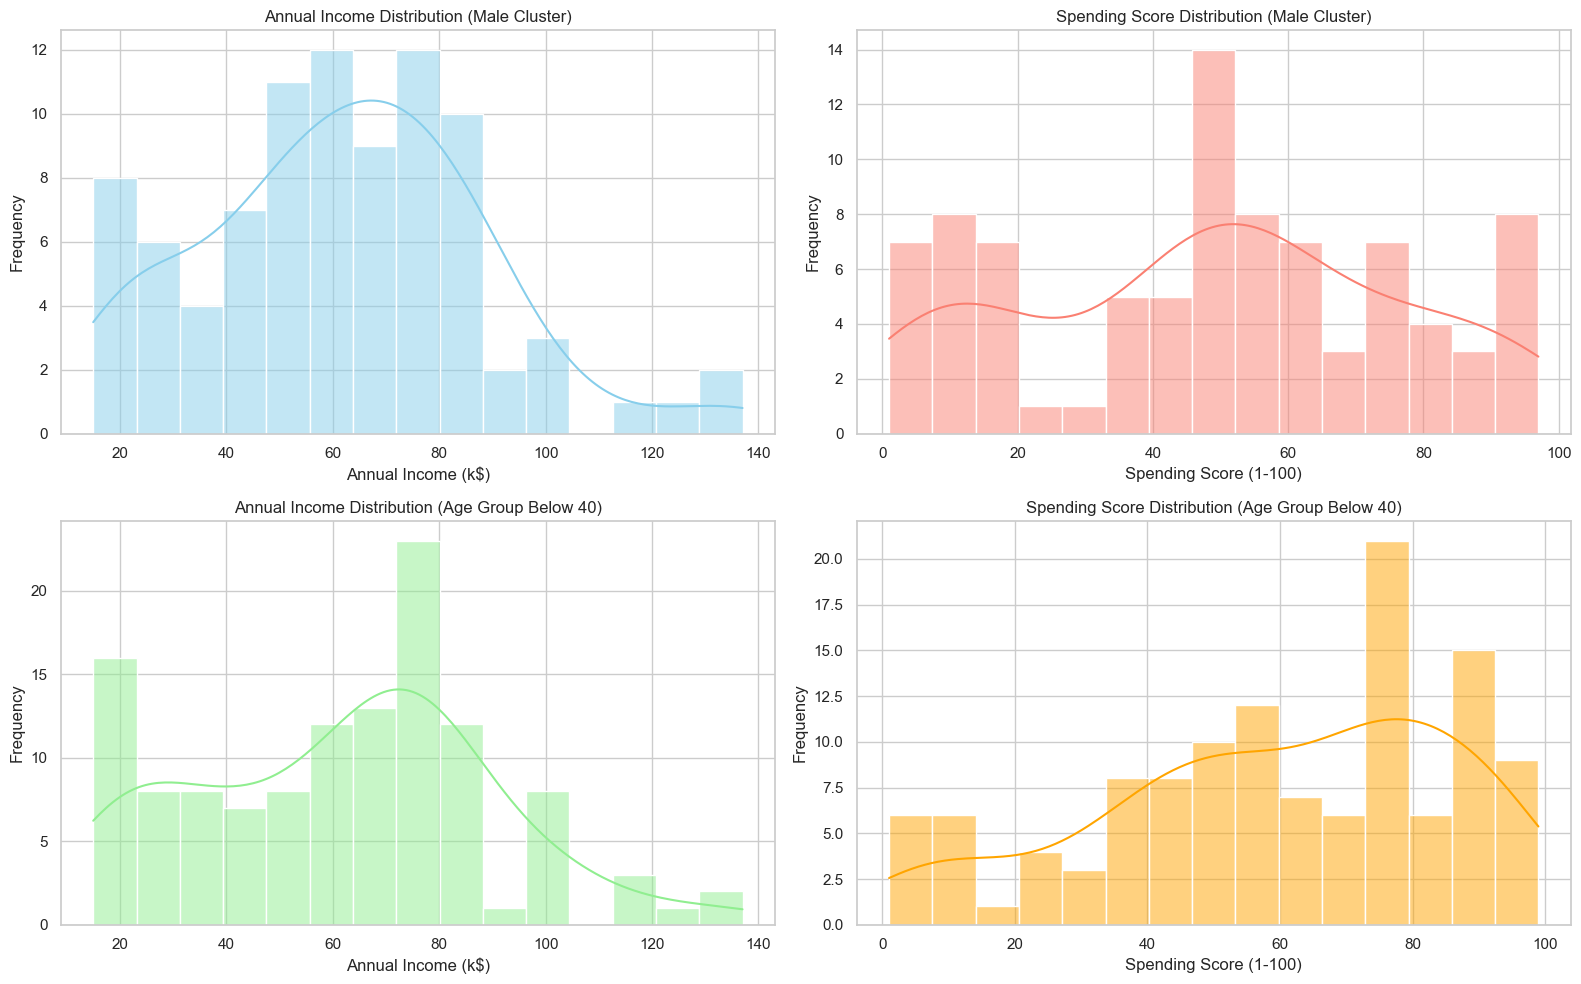

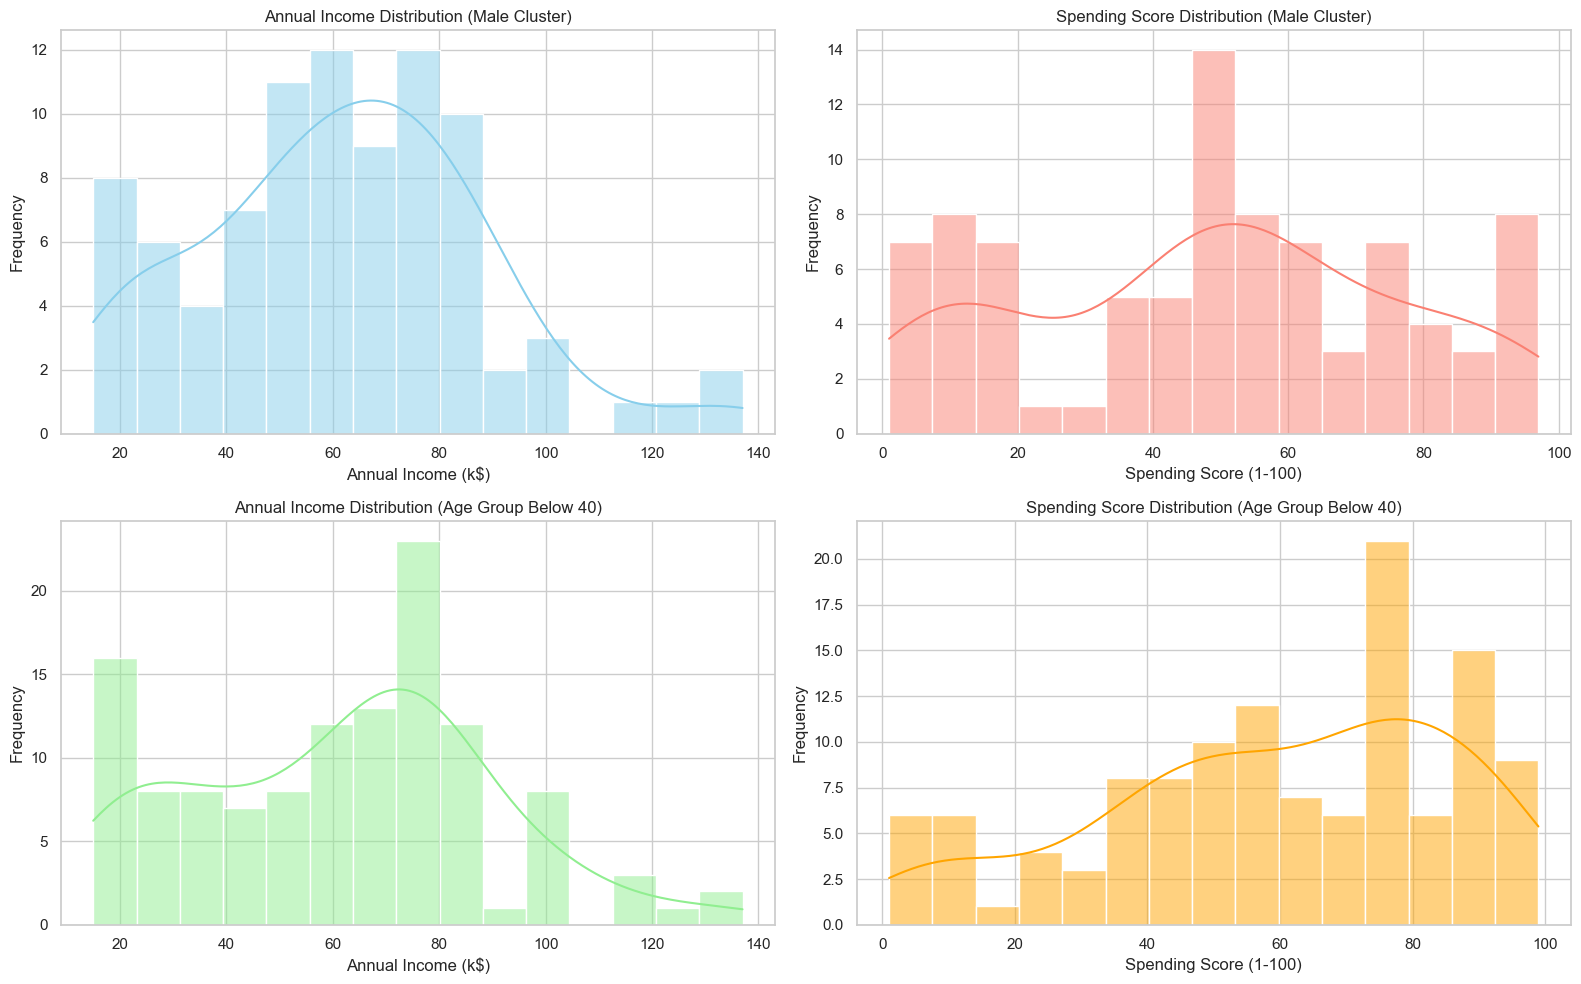

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler


# Load the Mall Customers dataset
url = 'C:\\Users\\marmi\\OneDrive\\Documents\\Mall_Customers.csv'
customers_df = pd.read_csv(url)

# Cluster Sampling based on 'Gender'
cluster_sample_gender = customers_df[customers_df['Gender'] == 'Male']  # Sampling only from Male cluster

# Cluster Sampling based on 'Age Group' (Creating age groups)
customers_df['Age_Group'] = pd.cut(customers_df['Age'], bins=[0, 40, 100], labels=['Below 40', 'Above 40'])
cluster_sample_age = customers_df[customers_df['Age_Group'] == 'Below 40']

# Set the figure size
plt.figure(figsize=(16, 10))
sns.set(style="whitegrid")

# Plotting the distribution of Annual Income and Spending Score for the Male cluster
plt.subplot(2, 2, 1)
sns.histplot(cluster_sample_gender['Annual Income (k$)'], kde=True, color='skyblue', bins=15)
plt.title("Annual Income Distribution (Male Cluster)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Frequency")

plt.subplot(2, 2, 2)
sns.histplot(cluster_sample_gender['Spending Score (1-100)'], kde=True, color='salmon', bins=15)
plt.title("Spending Score Distribution (Male Cluster)")
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Frequency")

# Plotting the distribution of Annual Income and Spending Score for the Age Group 'Below 40'
plt.subplot(2, 2, 3)
sns.histplot(cluster_sample_age['Annual Income (k$)'], kde=True, color='lightgreen', bins=15)
plt.title("Annual Income Distribution (Age Group Below 40)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Frequency")

plt.subplot(2, 2, 4)
sns.histplot(cluster_sample_age['Spending Score (1-100)'], kde=True, color='orange', bins=15)
plt.title("Spending Score Distribution (Age Group Below 40)")
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Frequency")

# Adjust layout for better readability
plt.tight_layout()
plt.show()

# Load the Mall Customers dataset
url = 'C:\\Users\\marmi\\OneDrive\\Documents\\Mall_Customers.csv'
customers_df = pd.read_csv(url)

# Cluster Sampling based on 'Gender'
cluster_sample_gender = customers_df[customers_df['Gender'] == 'Male']  # Sampling only from Male cluster

# Cluster Sampling based on 'Age Group' (Creating age groups)
customers_df['Age_Group'] = pd.cut(customers_df['Age'], bins=[0, 40, 100], labels=['Below 40', 'Above 40'])
cluster_sample_age = customers_df[customers_df['Age_Group'] == 'Below 40']

# Set the figure size
plt.figure(figsize=(16, 10))
sns.set(style="whitegrid")

# Plotting the distribution of Annual Income and Spending Score for the Male cluster
plt.subplot(2, 2, 1)
sns.histplot(cluster_sample_gender['Annual Income (k$)'], kde=True, color='skyblue', bins=15)
plt.title("Annual Income Distribution (Male Cluster)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Frequency")

plt.subplot(2, 2, 2)
sns.histplot(cluster_sample_gender['Spending Score (1-100)'], kde=True, color='salmon', bins=15)
plt.title("Spending Score Distribution (Male Cluster)")
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Frequency")

# Plotting the distribution of Annual Income and Spending Score for the Age Group 'Below 40'
plt.subplot(2, 2, 3)
sns.histplot(cluster_sample_age['Annual Income (k$)'], kde=True, color='lightgreen', bins=15)
plt.title("Annual Income Distribution (Age Group Below 40)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Frequency")

plt.subplot(2, 2, 4)
sns.histplot(cluster_sample_age['Spending Score (1-100)'], kde=True, color='orange', bins=15)
plt.title("Spending Score Distribution (Age Group Below 40)")
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Frequency")

# Adjust layout for better readability
plt.tight_layout()
plt.show()